In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('/Users/oguzhanaydin/Downloads/dataset (1).csv')


In [4]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.duplicated().count()

4920

In [6]:
for col in df.columns:
    
    df[col] = df[col].str.replace('_',' ')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
for col in df.columns:
    
    df[col] = df[col].str.replace('_',' ')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe().T

,count,unique,top,freq
Disease,4920,41,Fungal infection,120
Symptom_1,4920,34,vomiting,822
Symptom_2,4920,48,vomiting,870
Symptom_3,4920,54,fatigue,726
Symptom_4,4572,50,high fever,378
Symptom_5,3714,38,headache,348
Symptom_6,2934,32,nausea,390
Symptom_7,2268,26,abdominal pain,264
Symptom_8,1944,21,abdominal pain,276
Symptom_9,1692,22,yellowing of eyes,228


Using the describe function, we can see that there are 41 distinct disease types. Also, we can observe that at least 54 distinct symptom types exist. At this point, we do not know the exact number of unique symptom types. In the further analysis, we are going to determine the exact number.

In [9]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 18
Integer variables: 0
Float variables: 0


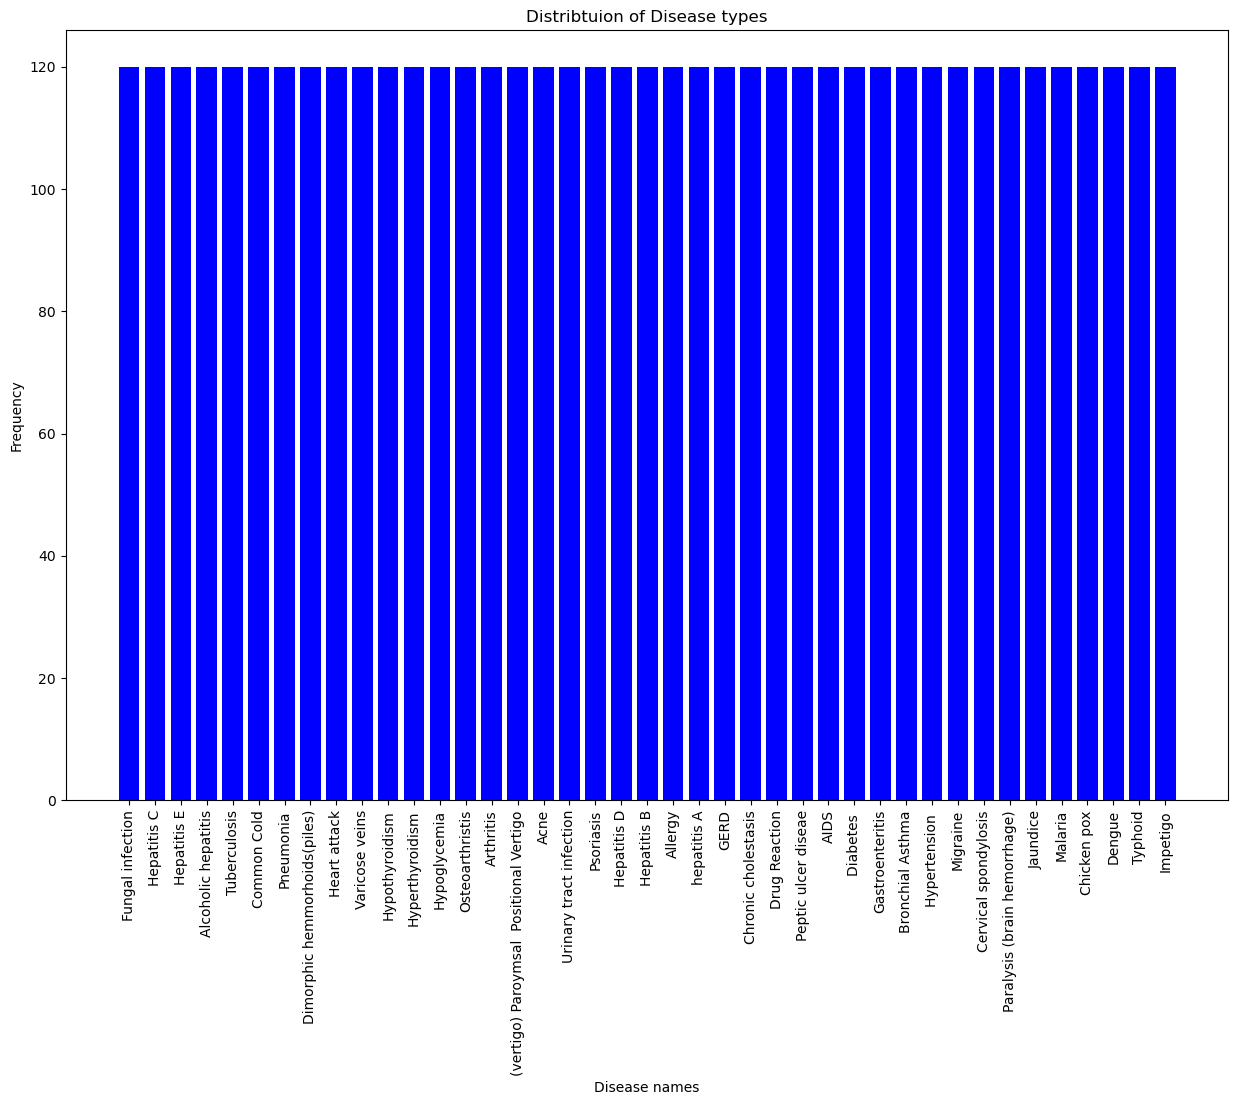

In [10]:
names = df["Disease"].value_counts().keys()
counts = df["Disease"].value_counts().values
plt.subplots(figsize=(15, 10))
plt.bar(names, counts, color="blue")
plt.xlabel("Disease names")
plt.ylabel("Frequency")
plt.title("Distribtuion of Disease types")
plt.xticks(rotation=90)
plt.show()

The plot above shows that the dataset is balanced, i.e. there are exactly 120 samples for each disease, and no further balancing is required. 

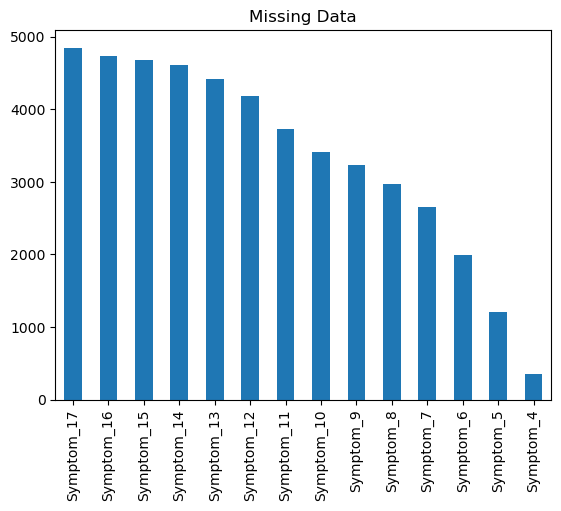

In [11]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending = False)
missing.plot.bar()
plt.title('Missing Data');

Because symptom entries begin with symptom 1 and go to symptom 17, it is natural for the number of missing values to decrease. According to the graph, each disease entry has at least three symptoms, which is useful for our models.

In [12]:
df.shape

(4920, 18)

In [14]:
df1 = pd.read_csv('Symptom-severity.csv')
df1

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
...,...,...
128,inflammatory_nails,2
129,blister,4
130,red_sore_around_nose,2
131,yellow_crust_ooze,3


In [15]:
df1['Symptom'] = df1['Symptom'].str.replace('_',' ')
df1.head(10)

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5
5,chills,3
6,joint pain,3
7,stomach pain,5
8,acidity,3
9,ulcers on tongue,4


In [16]:
df1['Symptom'].describe()

count                133
unique               132
top       fluid overload
freq                   2
Name: Symptom, dtype: object

In [17]:
df1['weight'].unique()

array([1, 3, 4, 5, 6, 2, 7])

In [18]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The trailing space from the symptom columns is removed


In [19]:
df = df.fillna(0)
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
vals_df = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals_df[vals_df == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals_df, columns=cols)
d.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Using the symptom rank, symptoms in the data are encoded.

In [21]:
d = d.replace('dischromic  patches', 0)
d = d.replace('spotting  urination',0)
df = d.replace('foul smell of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Symptoms with no rank are assigned to zero 


In [22]:
null_checking = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checking)


            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


# ML

In [23]:

from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.svm import SVC
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [24]:
data = df.iloc[:,1:].values
labels = df['Disease'].values

In [25]:
print(data)
print(labels)

[[1 3 4 ... 0 0 0]
 [3 4 0 ... 0 0 0]
 [1 4 0 ... 0 0 0]
 ...
 [6 4 0 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 [3 7 4 ... 0 0 0]]
['Fungal infection' 'Fungal infection' 'Fungal infection' ...
 'Urinary tract infection' 'Psoriasis' 'Impetigo']


In [26]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


# Machine Learning Models

## SVC

In [34]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [35]:
preds = model.predict(x_test)


F1-score% = 91.71493767913161 | Accuracy% = 91.97154471544715


<Axes: >

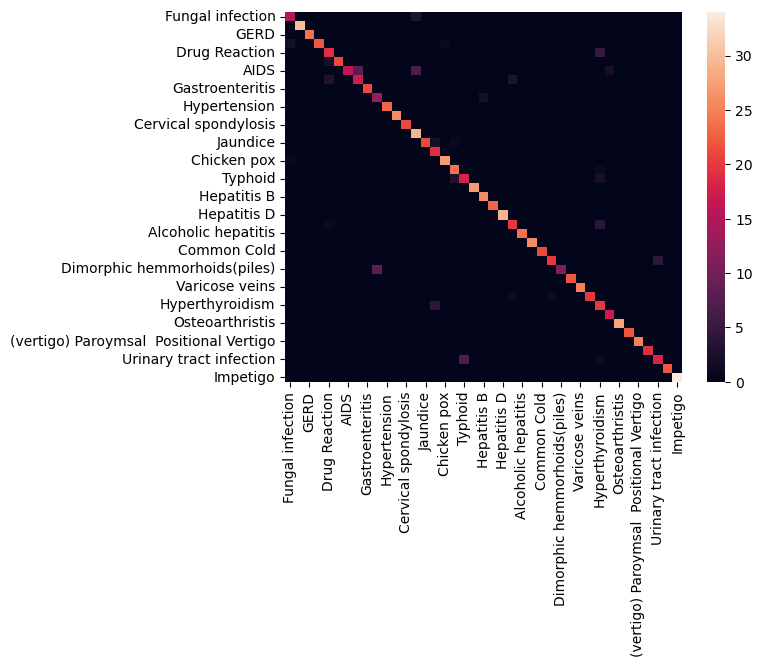

In [36]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [47]:
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)


F1-score% = 91.71493767913161 | Accuracy% = 91.97154471544715


In [45]:
print(metrics.classification_report(y_test,preds))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.83      0.83      0.83        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      0.88      0.94        25
                                Allergy       0.76      0.79      0.78        24
                              Arthritis       1.00      0.91      0.95        23
                       Bronchial Asthma       1.00      0.48      0.65        33
                   Cervical spondylosis       0.68      0.74      0.71        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       0.62      0.87      0.72        15
                            Common Cold       1.00      1.00      1.00        23
                           

# Random Forrest

In [49]:
model_Random_F = RandomForestClassifier()
model_Random_F.fit(x_train, y_train)


RandomForestClassifier()

In [50]:
preds_RF = model_Random_F.predict(x_test)


In [51]:
print('F1-score% =', f1_score(y_test, preds_RF, average='micro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds_RF)*100)


F1-score% = 99.49186991869918 | Accuracy% = 99.49186991869918


F1-score% = 99.49186991869918 | Accuracy% = 99.49186991869918


<Axes: >

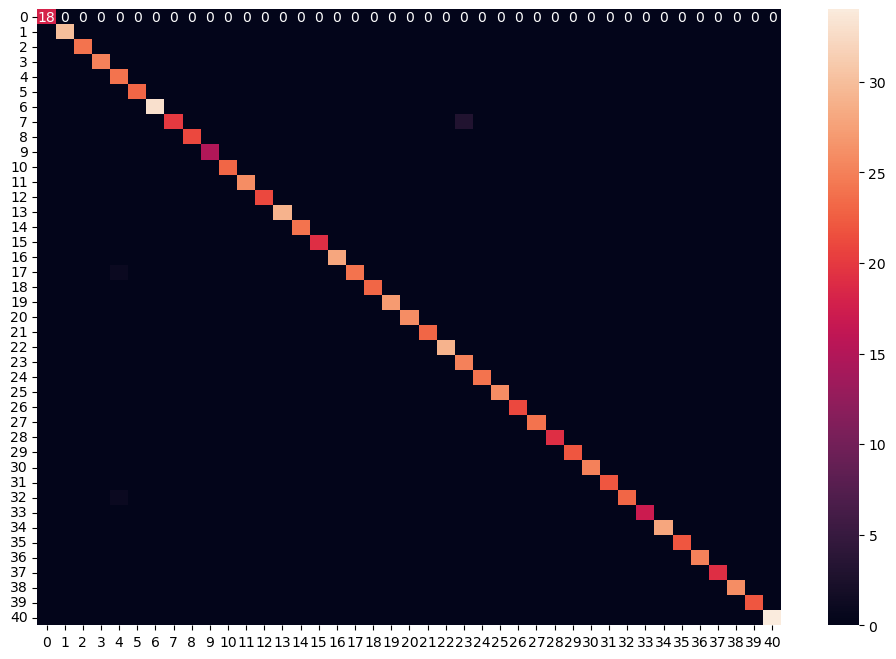

In [52]:
conf_mat1 = confusion_matrix(y_test, preds_RF)
print('F1-score% =', f1_score(y_test, preds_RF, average='micro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds_RF)*100)

plt.figure(figsize=(12,8))
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
sns.heatmap(conf_mat1,annot=True)

In [53]:
print(metrics.classification_report(y_test, preds_RF))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       0.92      1.00      0.96        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      0.87      0.93        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
                           

In [31]:
print(conf_mat1 )

[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]


# KNN

In [32]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(x_train, y_train)

C:\Users\ouzha\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=31, p=2,
           weights='uniform')

In [33]:
y_pred = knn.predict(x_test)


F1-score% = 91.38490153038103 | Accuracy% = 92.07317073170732


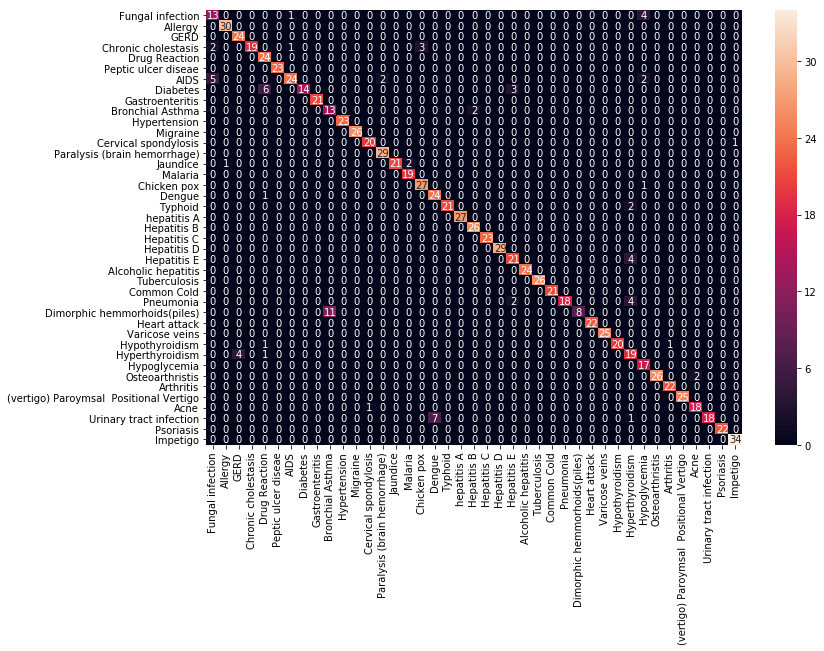

In [34]:
conf_mat2 = confusion_matrix(y_test, y_pred)
df_cm_2 = pd.DataFrame(conf_mat2, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, y_pred, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, y_pred)*100)
plt.figure(figsize=(12,8))
sns.heatmap(df_cm_2,annot=True)

In [35]:

from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(x_train, y_train)
pred_log = model_log.predict(x_test)


F1-score% = [ 78.94736842  74.28571429 100.          83.72093023  70.37037037
  68.57142857  62.74509804  45.16129032  95.          74.28571429
 100.         100.          86.95652174  71.875       97.87234043
  90.47619048  81.96721311  71.69811321  72.34042553 100.
  76.92307692 100.         100.          18.18181818 100.
 100.         100.          86.36363636  73.33333333  97.77777778
  98.03921569  85.          64.51612903  91.89189189 100.
  97.77777778 100.         100.          57.14285714  81.08108108
  89.23076923] | Accuracy% = 84.04471544715447


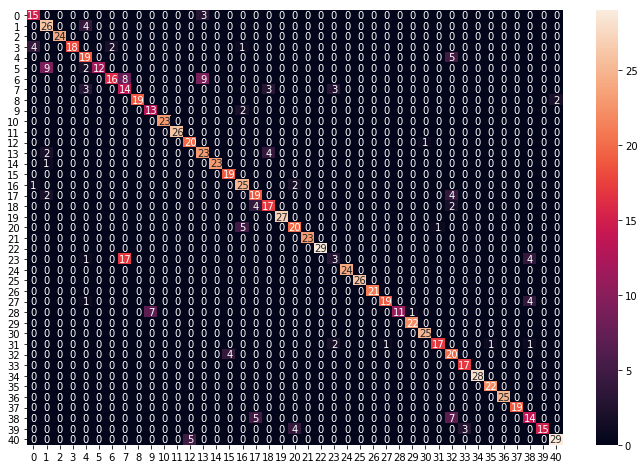

In [42]:
conf_mat_log = confusion_matrix(y_test, pred_log)
df_cm_log = pd.DataFrame(conf_mat2, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, pred_log, average=None)*100, '|', 'Accuracy% =', accuracy_score(y_test, pred_log)*100)
plt.figure(figsize=(12,8))
sns.heatmap(conf_mat_log , annot=True)


In [43]:
print(metrics.classification_report(y_test, pred_log))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.75      0.83      0.79        18
                                   AIDS       0.65      0.87      0.74        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      0.72      0.84        25
                                Allergy       0.63      0.79      0.70        24
                              Arthritis       1.00      0.52      0.69        23
                       Bronchial Asthma       0.89      0.48      0.63        33
                   Cervical spondylosis       0.36      0.61      0.45        23
                            Chicken pox       1.00      0.90      0.95        21
                    Chronic cholestasis       0.65      0.87      0.74        15
                            Common Cold       1.00      1.00      1.00        23
                           

In [54]:
input_data=(3,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0)

input_data_array=np.asarray(input_data)

input_data_reshape = input_data_array.reshape(1,-1)

prediction_RF = model_Random_F.predict(input_data_reshape)

In [55]:
print(prediction_RF)

['Acne']


In [56]:
prediction_SVC = model.predict(input_data_reshape)

In [57]:
print(prediction_SVC)

['Acne']
